In [8]:
import numpy as np
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [9]:
def single_linkage(cluster1, cluster2):
    return min(euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2)

def complete_linkage(cluster1, cluster2):
    return max(euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2)

def average_linkage(cluster1, cluster2):
    return np.mean([euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2])

In [10]:
def agglomerative_clustering(data, linkage):
    clusters = [[point] for point in data]

    while len(clusters) > 1:
        # Find the pair of clusters with the smallest distance
        distances = [(i, j, linkage(clusters[i], clusters[j])) 
                     for i in range(len(clusters)) for j in range(i+1, len(clusters))]
        i, j, _ = min(distances, key=lambda x: x[2])

        # Merge these two clusters
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]

    return clusters[0]

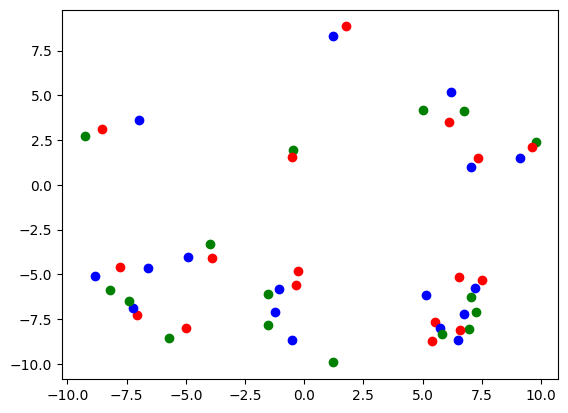

In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=50, centers=21, cluster_std=0.6)

# Perform agglomerative clustering
cluster = agglomerative_clustering(X, single_linkage)

# Plot the data points, color-coded by cluster membership
colors = ['red', 'blue', 'green']
for i, point in enumerate(cluster):
    plt.scatter(point[0], point[1], color=colors[i % 3])
plt.show()